# Setup

In [4]:
library(ggplot2)

# Section 1: Read CSV and Create Scatterplot

In [5]:
data <- read.csv("../data.csv")

In [6]:
ggplot(data, aes(x = X, y = Y)) +
  geom_point() +
  ggtitle("Initial Data with Outliers") +
  theme_minimal(base_rect = element_rect(fill = "white", colour = NA)) -> p1

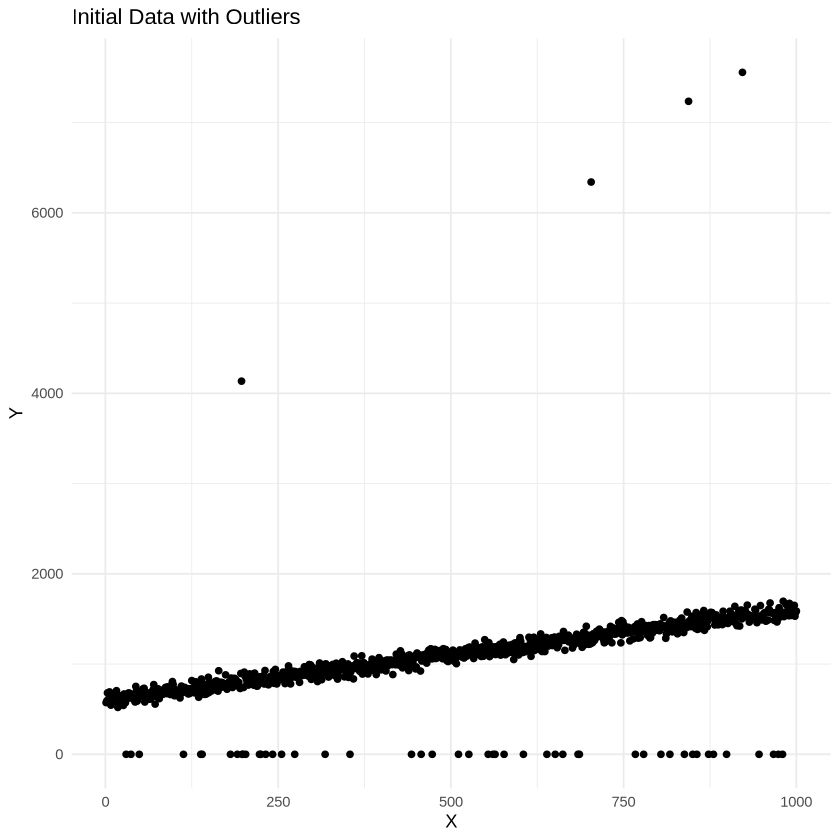

In [7]:
p1

ggsave("example-S2.png", plot = p1, bg = "white")

# Section 2: Remove Outliers and Create Scatterplot

In [8]:
#cutoff <- quantile(data$Y[data$Y > 0], 0.996) # Adjusting the percentile
cutoff <- 2000
outliers <- data$Y == 0 | data$Y > cutoff

In [9]:
clean_data <- data[!outliers, ]
outlier_data <- data[outliers, ]

In [10]:
ggplot(clean_data, aes(x = X, y = Y)) +
  geom_point() +
  geom_point(data = outlier_data, aes(x = X, y = Y), color = "red", shape = 4) +
  geom_hline(yintercept = cutoff, linetype = "dotted") +
  annotate("text", x = min(clean_data$X), y = cutoff + 10, label = paste("Cutoff:", round(cutoff, 2)), hjust = 0) +
  ggtitle("Data with Outliers Highlighted and Removed") +
  theme_minimal(base_rect = element_rect(fill = "white", colour = NA)) -> p2

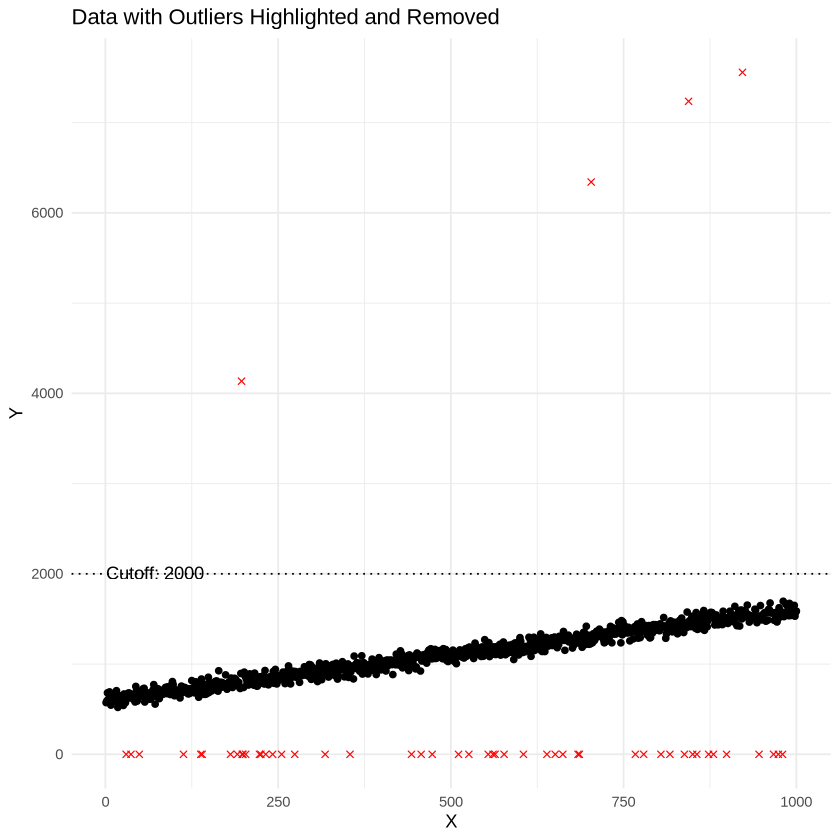

In [11]:
p2

In [12]:
ggsave("example-S3.png", plot = p2, bg = "white")

Saving 6.67 x 6.67 in image


# Section 3: Fit Linear Model, Plot, and Save Model Summary

In [13]:
model <- lm(Y ~ X, data = clean_data)
model_summary <- capture.output(summary(model))
writeLines(model_summary, "results-S4.txt")

In [14]:
ggplot(clean_data, aes(x = X, y = Y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  annotate("text", x = Inf, y = Inf, label = paste("Fit: Y =", round(coef(model)[1], 2), "+", round(coef(model)[2], 2), "*X"), hjust = 1.1, vjust = 1.1) +
  ggtitle("Linear Model Fit to Cleaned Data") +
  theme_minimal(base_rect = element_rect(fill = "white", colour = NA)) -> p3

`geom_smooth()` using formula = 'y ~ x'


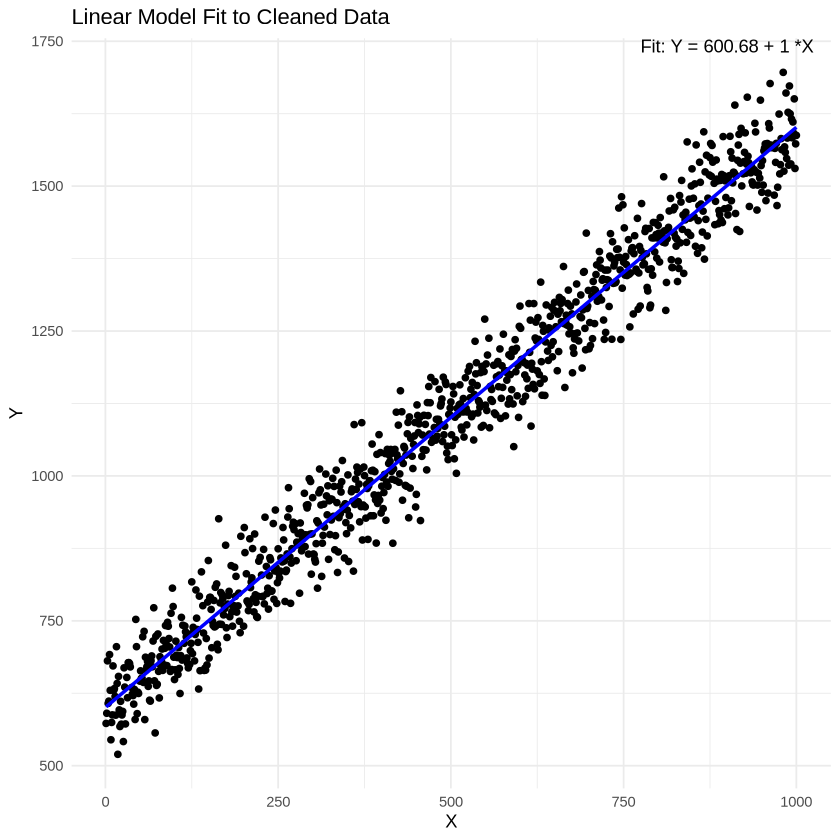

In [15]:
p3

In [16]:
ggsave("example-S4.png", plot = p3, bg = "white")

Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'
